# Importing libraries, making dictionary, and creating dataframe section

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv('FireSA.csv', index_col=0) #reading csv file, index_col to remove unnamed column

In [5]:
df = df.dropna() #dropping rows with null data
df

,0,1,2,3,4
0,2002,January,23.78,Spring Valley,1.0
1,2002,February,26.12,Porterville,2.0
2,2002,March,31.56,Winchester,7.0
4,2002,April,36.34,Porterville,5.0
5,2003,January,22.09,Winchester,0.0
6,2003,February,26.64,Spring Valley,1.0
7,2003,March,33.81,Spring Valley,3.0
8,2003,April,35.35,Porterville,6.0
9,2004,January,22.89,Winchester,1.0
10,2004,February,27.04,Porterville,1.0


In [6]:
df = df.rename(columns={'0':'Year','1':'Month','2':'Temperature','3':'Place','4':'Number'}) #renaming columns
df

,Year,Month,Temperature,Place,Number
0,2002,January,23.78,Spring Valley,1.0
1,2002,February,26.12,Porterville,2.0
2,2002,March,31.56,Winchester,7.0
4,2002,April,36.34,Porterville,5.0
5,2003,January,22.09,Winchester,0.0
6,2003,February,26.64,Spring Valley,1.0
7,2003,March,33.81,Spring Valley,3.0
8,2003,April,35.35,Porterville,6.0
9,2004,January,22.89,Winchester,1.0
10,2004,February,27.04,Porterville,1.0


# Q1. Which place has the most numerous cases of fire in general?

In [7]:
df[['Year','Month','Place','Number']].loc[df['Number'] == df['Number'].max()] #finding the maximum fire cases from the data

,Year,Month,Place,Number
2,2002,March,Winchester,7.0
12,2004,April,Winchester,7.0
33,2009,March,Spring Valley,7.0


In [9]:
Q1 = df.groupby('Place',as_index=False)['Number'].sum() #counts the overall number of fire cases
min_num = Q1['Number'].min()
Q1

,Place,Number
0,Porterville,26.0
1,Spring Valley,28.0
2,Winchester,50.0


In [284]:
df[['Place']].value_counts() #counts the overall monthly case records from each place

Place        
Winchester       13
Porterville      10
Spring Valley     9
dtype: int64

Text(0.5, 1.0, 'Overall Number of Fire Case Records')

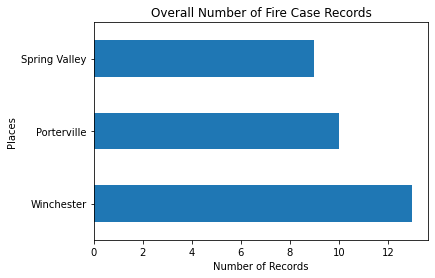

In [285]:
df['Place'].value_counts()[:3].plot(kind='barh')
plt.xlabel('Number of Records')
plt.ylabel('Places')
plt.title('Overall Number of Fire Case Records')

# Analysis

> Winchester and Spring Valley have attained the highest number of cases during a monthly duration, with Winchester getting 7 cases in March 2002 and April 2004 and Spring Valley getting the same number of cases in March 2009.

> Winchester has the most number of fire cases in the span of 2002 to 2009, with a total number of 50 fire cases. This is followed by Spring Valley with 28 cases, then Porterville with the least amount of 26 cases.

> Winchester has the most number of records on fire cases among the 3 places, with a number of 13, which is followed by Porterville with 10, and then Spring Valley with 9. 

# Q2. What is the average temperature in Winchester when number of cases is higher than 2?

In [286]:
Q2 = df[['Place','Temperature','Number']][(df['Place'] == 'Winchester') & (df['Number'] > 2)] 
#finding records of Winchester and its temperature on case numbers higher than 2
Q2

,Place,Temperature,Number
2,Winchester,31.56,7.0
11,Winchester,32.68,4.0
12,Winchester,36.24,7.0
15,Winchester,32.69,6.0
19,Winchester,32.67,4.0
24,Winchester,33.07,4.0
25,Winchester,36.90,5.0
26,Winchester,25.03,3.0
34,Winchester,34.67,5.0


In [287]:
Q2[['Temperature']].count()

Temperature    9
dtype: int64

In [288]:
Q2[['Temperature']].mean()

Temperature    32.834444
dtype: float64

# Analysis

> From the 9 monthly recorded Winchester fire incidents, the average temperature experienced during those months is around 32.83 C.

# Q3. What is the maximum temperature during January?

In [289]:
Q3 = df[['Month','Place','Temperature']].loc[(df['Month'] == 'January')] 
#selecting month, place, and temperature rows with the month of January
Q3

,Month,Place,Temperature
0,January,Spring Valley,23.78
5,January,Winchester,22.09
9,January,Winchester,22.89
13,January,Spring Valley,22.05
17,January,Porterville,24.73
21,January,Porterville,25.94
26,January,Winchester,25.03
31,January,Porterville,24.53


In [290]:
maxtemp = df['Temperature'].loc[(df['Month'] == 'January')].max() #maxtemp as maximum temperature value
df.loc[(df['Temperature'] == maxtemp)] #finding the row that has a temperature equal to maxtemp

,Year,Month,Temperature,Place,Number
21,2007,January,25.94,Porterville,1.0


# Analysis

> The maximum temperature recorded during the month of January can be found in Porterland during January 2007, in which there was a recorded 25.94 C temperature.

# Q4. Which year/s has/have the most number of cases?

In [291]:
Q4 = df.groupby('Year',as_index=False)['Number'].sum() #grouping up / adding up each year's case numbers
max_num = Q4['Number'].max()
Q4

,Year,Number
0,2002,15.0
1,2003,10.0
2,2004,13.0
3,2005,13.0
4,2006,12.0
5,2007,11.0
6,2008,15.0
7,2009,15.0


Text(0.5, 1.0, 'Number of Cases in a Year')

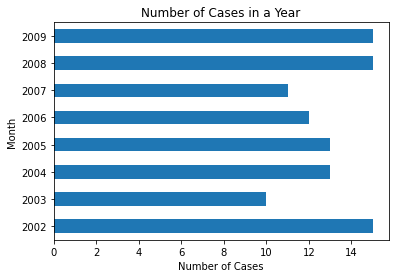

In [292]:
Q4.groupby('Year',as_index=True)['Number'].sum()[:8].plot(kind='barh')
plt.xlabel('Number of Cases')
plt.ylabel('Month')
plt.title('Number of Cases in a Year')

In [293]:
Q4[['Year', 'Number']].loc[(Q4['Number'] == max_num)] #finding year and number rows with the maximum cases

,Year,Number
0,2002,15.0
6,2008,15.0
7,2009,15.0


# Analysis

> The years that have been found to have the most number of fire cases among the three places are during 2002, 2008, and 2009, with a total amount of 15 cases each.

# Q5. Which month has the least number of cases?

In [294]:
Q5 = df.groupby('Month',as_index=False)['Number'].sum() #grouping up / adding up each year's case numbers
min_num = Q5['Number'].min()
Q5

,Month,Number
0,April,44.0
1,February,13.0
2,January,8.0
3,March,39.0


Text(0.5, 1.0, 'Overall Monthly Number of Cases')

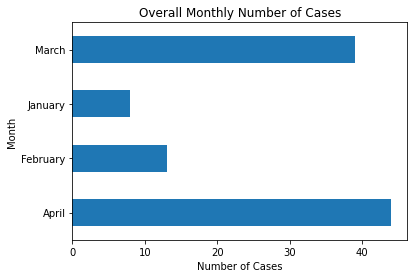

In [295]:
Q5.groupby('Month',as_index=True)['Number'].sum()[:4].plot(kind='barh')
plt.xlabel('Number of Cases')
plt.ylabel('Month')
plt.title('Overall Monthly Number of Cases')

In [296]:
Q5[['Month', 'Number']].loc[(Q5['Number'] == min_num)] #finding year and number rows with the minimum cases

,Month,Number
2,January,8.0


# Analysis

> The month that has the least number of cases recorded among the three places is January, which only has a total of 8 cases overall.

# Q6. Which place has the greatest number of cases during April?

In [297]:
Q6 = df[['Year','Month','Place','Number']][df['Month'] == 'April'] #finding the row with a month value of April
max_num = Q6['Number'].max()
Q6

,Year,Month,Place,Number
4,2002,April,Porterville,5.0
8,2003,April,Porterville,6.0
12,2004,April,Winchester,7.0
16,2005,April,Porterville,5.0
20,2006,April,Spring Valley,5.0
25,2007,April,Winchester,5.0
30,2008,April,Spring Valley,6.0
34,2009,April,Winchester,5.0


In [298]:
Q6[['Year','Month','Place','Number']].loc[(Q6['Number'] == max_num)] #locating row with the maximum number of cases in April

,Year,Month,Place,Number
12,2004,April,Winchester,7.0


# Analysis

> Winchester is the place with the greatest number of cases out of all recorded April cases, with a number of 7 fire cases during 2004.

# Q7. What is the least temperature during February of 2002 to 2004?

In [299]:
Q7 = df[['Year','Month','Place','Temperature']][(df['Year'] >= 2002) & (df['Year'] <= 2004) & (df['Month'] == 'February')]
#finding row with the year values between 2002 and 2004, as well as a month value of February
min_temp = Q7['Temperature'].min()
Q7

,Year,Month,Place,Temperature
1,2002,February,Porterville,26.12
6,2003,February,Spring Valley,26.64
10,2004,February,Porterville,27.04


In [300]:
Q7[['Year','Month','Place','Temperature']].loc[(Q7['Temperature'] == min_temp)]

,Year,Month,Place,Temperature
1,2002,February,Porterville,26.12


# Analysis

> The least temperature recorded during the month of February from 2002 to 2004 was from Porterville during 2002, in which there was a recorded 26.12 C. 

# Q8. Which place has the least temperature from 2008 to 2009?

In [301]:
Q8 = df[['Year','Month','Place','Temperature']][(df['Year'] >= 2008) & (df['Year'] <= 2009)]
#finding row with the year values between 2008 and 2009
min_temp = Q8['Temperature'].min()
Q8

,Year,Month,Place,Temperature
26,2008,January,Winchester,25.03
27,2008,February,Porterville,29.68
28,2008,March,Spring Valley,30.32
30,2008,April,Spring Valley,34.68
31,2009,January,Porterville,24.53
32,2009,February,Winchester,27.34
33,2009,March,Spring Valley,31.63
34,2009,April,Winchester,34.67


In [302]:
Q8[['Year','Month','Place','Temperature']].loc[(Q8['Temperature'] == min_temp)]

,Year,Month,Place,Temperature
31,2009,January,Porterville,24.53


# Analysis

> Porterville has the least temperature recorded during the years of 2008 to 2009, with a temperature value of 24.53 C during January of 2009.

# Q9. What is the highest temperature from 2003 to 2007?

In [303]:
Q9 = df[['Year','Month','Place','Temperature']][(df['Year'] >= 2003) & (df['Year'] <= 2007)]
#finding row with the year values between 2003 and 2007
max_temp = Q9['Temperature'].max()
Q9

,Year,Month,Place,Temperature
5,2003,January,Winchester,22.09
6,2003,February,Spring Valley,26.64
7,2003,March,Spring Valley,33.81
8,2003,April,Porterville,35.35
9,2004,January,Winchester,22.89
10,2004,February,Porterville,27.04
11,2004,March,Winchester,32.68
12,2004,April,Winchester,36.24
13,2005,January,Spring Valley,22.05
14,2005,February,Porterville,27.63


In [304]:
Q9[['Year','Month','Place','Temperature']].loc[(Q9['Temperature'] == max_temp)]

,Year,Month,Place,Temperature
25,2007,April,Winchester,36.9


# Analysis

> Winchester has the highest recorded temperature during the years of 2003 to 2007, with a recorded temperature value of 36.9 C.

# Q10. Which place has the least case of fire?

In [305]:
Q10 = df.groupby('Place',as_index=False)['Number'].sum() #grouping up / adding up each place's case numbers
min_num = Q10['Number'].min()
Q10

,Place,Number
0,Porterville,26.0
1,Spring Valley,28.0
2,Winchester,50.0


Text(0.5, 1.0, 'Overall Number of Cases in a Place')

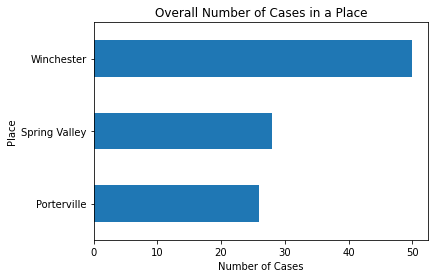

In [306]:
Q10.groupby('Place',as_index=True)['Number'].sum()[:3].plot(kind='barh')
plt.xlabel('Number of Cases')
plt.ylabel('Place')
plt.title('Overall Number of Cases in a Place')

In [307]:
Q10[['Place', 'Number']].loc[(Q10['Number'] == min_num)]

,Place,Number
0,Porterville,26.0


# Analysis

> Porterville has the least cases of fire incidents among the three places from 2002 to 2009, with only 26 cases. This is followed by Spring Valley with a total of 28 cases, and then Winchester with the highest amount of 50 cases.

# Conclusion/s:

In this data analysis, the fire incident situations of three places, which are Porterville, Spring Valley, and Winchester, were inspected. Based from analyses on the temperature values recorded from these places, Winchester has seen to be prominent across the given timeframes in terms of recording the highest temperature value, which supports the highest number of fire cases that is also discovered from the the place. Alongside this, Porterville is the complete opposite of Winchester's results, having the least temperature value recorded as well as the least amount of fire cases recorded. Aside from this, the month of January is also the coolest month for these three places, while April can be considered the hottest month. With such conclusions, fire action should be provided the most on Winchester, especially during the month of April, due to the level of temperature and amount of fire cases found from the records of the area.